# Introduction


Geographic information systems use GeoTIFF and other formats to organize and store gridded, or raster, datasets. Rasterio reads and writes these formats and provides a Python API based on N-D arrays.

This module discusses how to explore and analyse high-resolution imagery data. In particular, it provides step-by-step instructions on how to perform foundational data analysis using Numpy, Matplotlib, and Rasterio Python libraries, and apply these techniques to satellite data.


## Importing Rasterio, NumPy, and Matplotlib

In [5]:
import rasterio #import rasterio
from rasterio import plot
import numpy as np #import numpy
import matplotlib.pyplot as plt #import matplot lib

%matplotlib inline

## Working with True Color Images

In [6]:
#Sentinel-2 True Color Image
#Read the image using rasterio
satimage = rasterio.open('T50HLK_20201222T021339_TCI.jp2')

In [7]:
#Return the 1-based indexes of each band in the dataset
satimage.indexes

(1, 2, 3)

In [8]:
#Read the red, green, and blue bands' raw pixels as n-d arrays
red, green, blue = satimage.read()

In [9]:
#Return the data type of the blue band
type(blue)

numpy.ndarray

In [10]:
#print blue
blue

array([[70, 66, 61, ..., 95, 86, 89],
       [73, 67, 65, ..., 75, 67, 72],
       [69, 63, 67, ..., 76, 68, 64],
       ...,
       [66, 71, 73, ..., 58, 59, 59],
       [70, 67, 74, ..., 58, 58, 57],
       [77, 71, 71, ..., 59, 58, 57]], dtype=uint8)

In [11]:
#Return the data type of the blue band
# unsigned integer of 8 bits, 0-255
# unsigned integer of 16 bits, 0-65535
# unsigned integer of 32 bits, 0-4294967295
blue.dtype

dtype('uint8')

In [12]:
# Return the minimum value of the red band values
red.min()

0

In [13]:
# Return the maximum value of the red band values
red.max()

255

In [14]:
# Get metadata of the image read
satimage.profile
#CRS -> Coordinate Reference Systems

{'driver': 'JP2OpenJPEG', 'dtype': 'uint8', 'nodata': None, 'width': 10980, 'height': 10980, 'count': 3, 'crs': CRS.from_epsg(32750), 'transform': Affine(10.0, 0.0, 300000.0,
       0.0, -10.0, 6500020.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'interleave': 'pixel'}

In [15]:
#impor the math library
import math

In [16]:
## Get value of the pixel 52.5 kms east and 50 kms south of the image's upper upper left corner
x_coord = satimage.bounds.left+52500 #Value of pixel 52.5 kilometers east 
y_coord = satimage.bounds.top-10000 #value of the pixel 10 kilometers south

##Return the row an column index of the pixel at x_coord and y_coord
row, col = satimage.index(x_coord, y_coord, op=math.floor)

In [17]:
##Row and column index at the given x and y values
row, col

(1000, 5250)

In [18]:
x_coord, y_coord

(352500.0, 6490020.0)

In [19]:
## blue value at given row and col index values
blue[row, col]

63

In [20]:
## green value at given row and col index values
green[row, col]

38

In [21]:
## red value at given row and col index values
red[row, col]

26

In [22]:
## Find the spatial coordinates of the center of the image
## https://epsg.io to find lat and long
satimage.xy(satimage.height // 2, satimage.width // 2)

(354905.0, 6445115.0)

In [23]:
## Stack the red, green, and blue bands using d stack
## dstack concatenates along the third dimension
rgb = np.dstack((red, green,blue))
rgb.shape

(10980, 10980, 3)

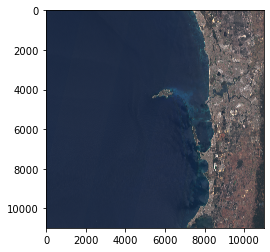

In [24]:
##plot rgb values
plt.imshow(rgb) #Display data as image
plt.show()

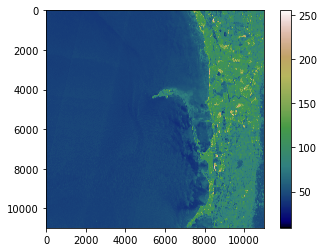

In [25]:
fig2 = plt.imshow(green) #Display the green band as image
fig2.set_cmap('gist_earth') #set the color map to green
plt.colorbar() # Add color bar to the plot
plt.show() #show plot

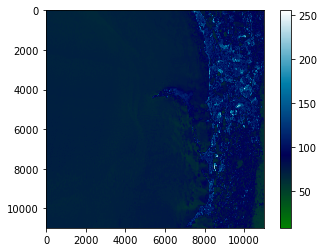

In [26]:
fig = plt.imshow(blue) #Display the blue band as image
fig.set_cmap('ocean') #set the color map to blue
plt.colorbar() # Add color bar to the plot
plt.show() ##show plot

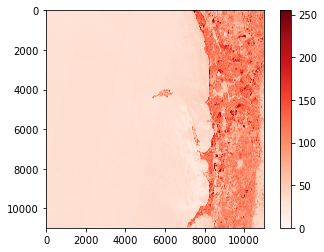

In [27]:
fig = plt.imshow(red) #Display the red band as image
fig.set_cmap('Reds') #set the color map to red
plt.colorbar() #Add color bar to the plot
plt.show() ##show plot

## Workings with Multiple Bands

In [28]:
imagepath = '/S2B_MSIL1C_20201222T021339_N0209_R060_T50HLK_20201222T040638/GRANULE/L1C_T50HLK_A019820_20201222T021652/IMG_DATA/' #update this path if necessary
band2 = rasterio.open(imagepath+'T50HLK_20201222T021339_B02.jp2', driver='JP2OpenJPEG') #blue band
band3 = rasterio.open(imagepath+'T50HLK_20201222T021339_B03.jp2', driver='JP2OpenJPEG') #green band
band4 = rasterio.open(imagepath+'T50HLK_20201222T021339_B04.jp2', driver='JP2OpenJPEG') #red band
band8 = rasterio.open(imagepath+'T50HLK_20201222T021339_B08.jp2', driver='JP2OpenJPEG') #NIR band

In [29]:
print (band2.indexes) ## Return the indexes of each band in the dataset
print (band3.indexes) ## Return the indexes of each band in the dataset
print (band4.indexes) ## Return the indexes of each band in the dataset
print (band8.indexes) ## Return the indexes of each band in the dataset

(1,)
(1,)
(1,)
(1,)


In [30]:
red2 = band4.read(1) #Read the red band's dataset raw pixels as an N-d array.
green2 = band3.read(1) #Read the green band's dataset raw pixels as an N-d array.
blue2 = band2.read(1) #Read the blue band's dataset raw pixels as an N-d array.
nir2 = band8.read(1) #Read the NIR band's dataset raw pixels as an N-d array.

In [31]:
red2.dtype ## Data type of the red band array
# unsigned integer of 16 bits, 0-65535

dtype('uint16')

In [32]:
red2 #Display the red band array

array([[ 343,  430,  322, ..., 1452, 1160, 1347],
       [ 357,  411,  317, ..., 1097,  704,  903],
       [ 382,  379,  344, ..., 1188,  715,  721],
       ...,
       [ 542,  585,  462, ...,  595,  639,  648],
       [ 466,  576,  663, ...,  633,  652,  626],
       [ 451,  491,  587, ...,  574,  574,  569]], dtype=uint16)

## Stacking Bands

In [33]:
##Scaling data before stacking bands so that all values lie between 0 and 1
def scale(array):
    array_min, array_max = array.min(), array.max()
    return (array - array_min) / (array_max - array_min) ## (array(i) - array_min) / (array_max - array_min)

red3 = scale(red2) #scale the red band values
green3 = scale(green2) #scale the green band values
blue3 = scale(blue2) #scale the blue band values
nir3 = scale(nir2)#scale the NIR band values

In [34]:
nir3.dtype #Print the data type of the NIR band

dtype('float64')

In [35]:
rgb2 = np.dstack((red3, green3, blue3)) ##d-stack bands

In [36]:
rgb2.shape ## Print the shape of rgb2 array

(10980, 10980, 3)

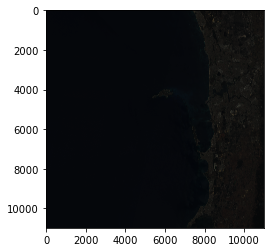

In [37]:
plt.imshow(rgb2) #show the RGB data as image
plt.show()

In [38]:
trueColor = rasterio.open('myTrueColor.tiff', 'w', driver='Gtiff', ## Opens myTrueColor.tiff for writing
                         width = band4.width, #number of columns of the raster data
                         height = band4.height, #number of rows of the raster data
                         count=3, #number of dataset bands
                         crs = band4.crs, #The coordinate reference system
                         transform = band4.transform, #Affine transformation mapping the pixel space to geographic space
                         dtype = 'float64' #the data type of the bands
                         )
trueColor.write(blue3,1) # Write the blue band to myTrueColor.tiff
trueColor.write(green3,2)# Write the green band to myTrueColor.tiff
trueColor.write(red3,3)# Write the red band to myTrueColor.tiff
trueColor.close()# close the file

In [39]:
#Stacking NIR, Red, and Green bands
nrg = np.dstack((nir3, red3, green3)) 

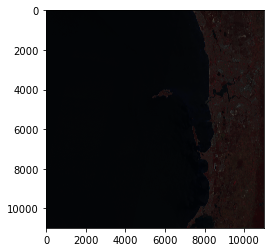

In [40]:
##Display the NRG data as image
plt.imshow(nrg)

## Generating NDVI

In [41]:
##Normalized difference vegetation index
###Assessed whether a space has live green vegetation

In [42]:
bandRed = red2.astype('float64')
bandNIR = nir2.astype('float64')

<AxesSubplot:>

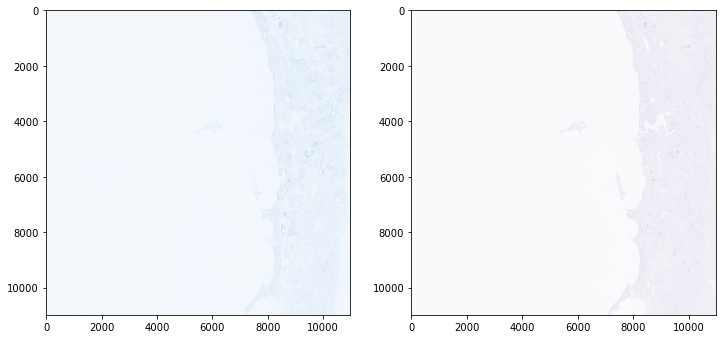

In [43]:
fig5, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
plot.show(bandRed, ax=ax1, cmap='Blues')
plot.show(bandNIR, ax=ax2, cmap='Purples')

In [44]:
ndvi = (bandNIR-bandRed)/(bandNIR+bandRed) ##Algorithm to calculate NDVI

In [45]:
ndviImage = rasterio.open('ndviImage.tiff','w',driver='Gtiff', ## Opens ndviImage.tiff for writing
                          width=band4.width, #number of columns of the raster data
                          height = band4.height, #number of rows of the raster data
                          count=1, #number of dataset bands
                          crs=band4.crs, #The coordinate reference system
                          transform=band4.transform, #Affine transformation mapping the pixel space to geographic space
                          dtype='float64') #the data type of the bands
ndviImage.write(ndvi,1) # Write the NDVI array to ndviImage.tiff
ndviImage.close()

In [46]:
ndvi.dtype #Print the data type of the elements of the NDVI array

dtype('float64')

In [47]:
type(ndvi) #Print the type of the NDVI variable

numpy.ndarray

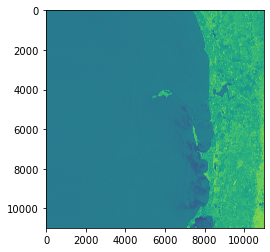

In [48]:
plt.imshow(ndvi)  #Plot the NDVI array as image